In [3]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Tyumen_University/data/students.csv")
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          118 non-null    int64  
 1   Growth                       118 non-null    int64  
 2   Shoe size                    118 non-null    int64  
 3   Course number                118 non-null    int64  
 4   Year of birth                118 non-null    int64  
 5   Friend number                118 non-null    int64  
 6   Russian rating               118 non-null    int64  
 7   Maths rating                 118 non-null    int64  
 8   Physics rating               118 non-null    int64  
 9   Computer science rating      118 non-null    int64  
 10  Chemistry rating             118 non-null    int64  
 11  Literature rating            118 non-null    int64  
 12  History rating               118 non-null    int64  
 13  Geography rating    

In [6]:
coder = preprocessing.LabelEncoder()

In [7]:
for name in ['Sex','Coin','Animal','Army','Glasses','Your rating in university',
             'Fastfood','Hostel','Chocolate','Brother-sister','Plane seat','Problems in last semester',
             'Rock paper scissors','Strange people','Your insitute']:
  coder.fit(df[name])
  df[name]=coder.transform(df[name])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          118 non-null    int64  
 1   Growth                       118 non-null    int64  
 2   Shoe size                    118 non-null    int64  
 3   Course number                118 non-null    int64  
 4   Year of birth                118 non-null    int64  
 5   Friend number                118 non-null    int64  
 6   Russian rating               118 non-null    int64  
 7   Maths rating                 118 non-null    int64  
 8   Physics rating               118 non-null    int64  
 9   Computer science rating      118 non-null    int64  
 10  Chemistry rating             118 non-null    int64  
 11  Literature rating            118 non-null    int64  
 12  History rating               118 non-null    int64  
 13  Geography rating    

## Узнаем важность каждого признака в задаче предсказания пола человека

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()
result=selector.fit(df[df.columns], df['Sex'])
result.feature_importances_  

array([0.00592948, 0.06353682, 0.09761252, 0.00417353, 0.00404558,
       0.00428006, 0.00996404, 0.00882274, 0.01007999, 0.02480265,
       0.00205784, 0.00282543, 0.00430978, 0.00116915, 0.00479224,
       0.00204568, 0.0054692 , 0.00212942, 0.004806  , 0.00452747,
       0.00522841, 0.01420826, 0.00607199, 0.40273366, 0.00490109,
       0.0302071 , 0.00356838, 0.00439984, 0.00200388, 0.00349196,
       0.00208985, 0.00405646, 0.00646956, 0.00488465, 0.11043035,
       0.00234286, 0.0665505 , 0.00390211, 0.00419075, 0.00447174,
       0.00338976, 0.00357718, 0.00321482, 0.00651206, 0.00850884,
       0.00235453, 0.01474391, 0.00411588])

In [10]:
features_table= pd.DataFrame(result.feature_importances_, index =df.columns,
                                              columns =['importance'])
print(features_table)

                             importance
Age                            0.005929
Growth                         0.063537
Shoe size                      0.097613
Course number                  0.004174
Year of birth                  0.004046
Friend number                  0.004280
Russian rating                 0.009964
Maths rating                   0.008823
Physics rating                 0.010080
Computer science rating        0.024803
Chemistry rating               0.002058
Literature rating              0.002825
History rating                 0.004310
Geography rating               0.001169
Biology rating                 0.004792
Foreign language rating        0.002046
Social science rating          0.005469
Distance to home km            0.002129
Minutes to first class         0.004806
Children number                0.004527
Removed teeth                  0.005228
Weight                         0.014208
Glasses                        0.006072
Sex                            0.402734


In [11]:
features_table.sort_values(by='importance', ascending=False)

,importance
Sex,0.402734
Army,0.110430
Shoe size,0.097613
Hair length,0.066551
Growth,0.063537
Coin,0.030207
Computer science rating,0.024803
Middle and ring finger,0.014744
Weight,0.014208
Physics rating,0.010080


А далее нужно оставить лишь несколько признаков из топа по значимости и по ним тренировать модель

Допустим мы хотим оставить 7 признаков:

Army 0.092844

Shoe size 0.090263

Hair length 0.063735

Growth 0.063282

Coin 0.034178

Computer science rating 0.022314

Weight 0.012210

Давайте заново загрузим данные, так как мы меняли значения в категориальных столбцах


In [17]:
df = pd.read_csv("/content/drive/MyDrive/Tyumen_University/data/students.csv")
df_cut=df[['Army','Shoe size', 'Hair length', 'Growth', 'Coin', 'Computer science rating', 'Weight','Sex']]
df_cut=df_cut.dropna()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 185
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Army                     157 non-null    object 
 1   Shoe size                157 non-null    int64  
 2   Hair length              157 non-null    float64
 3   Growth                   157 non-null    int64  
 4   Coin                     157 non-null    object 
 5   Computer science rating  157 non-null    int64  
 6   Weight                   157 non-null    float64
 7   Sex                      157 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 11.0+ KB


In [18]:
df_cut = pd.get_dummies(df_cut, drop_first=True)
df_cut.head()

,Shoe size,Hair length,Growth,Computer science rating,Weight,Army_не призовут (по разным причинам),Coin_Решка,Sex_мужской
0,40,50.0,170,84,64.0,1,0,0
1,43,7.0,191,72,73.0,1,0,1
2,41,4.0,172,0,60.0,0,1,1
3,38,20.0,168,0,59.0,1,1,0
4,36,55.0,159,0,57.0,1,0,0


In [19]:
model=tree.DecisionTreeClassifier(max_depth=3)
model.fit(df_cut[['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', 'Computer science rating', 'Weight']].values.reshape(-1,7), y=df_cut['Sex_мужской'].values)

DecisionTreeClassifier(max_depth=3)

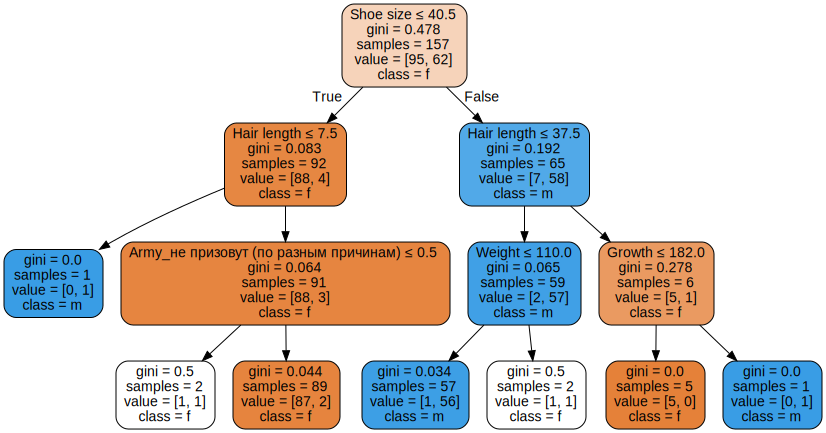

In [20]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', 'Computer science rating', 'Weight'],  
                      class_names=['f', 'm'],  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [21]:
df_test=pd.read_csv('/content/drive/MyDrive/Tyumen_University/data/students_test.csv', delimiter=',')
df_cut_test=df_test[['Army','Shoe size', 'Hair length', 'Growth', 'Coin', 'Computer science rating', 'Weight','Sex']]
df_cut_test=df_cut_test.dropna()

In [22]:
df_cut_test=pd.get_dummies(df_cut_test,drop_first=True)
df_cut_test.head()

,Shoe size,Hair length,Growth,Computer science rating,Weight,Army_не призовут (по разным причинам),Coin_Решка,Sex_мужской
0,44.0,1.2,180.0,88,78.0,1,0,1
1,38.0,30.0,167.0,0,50.0,1,0,0
2,41.0,50.0,178.0,0,70.0,1,0,0
3,35.0,20.0,156.0,0,47.0,1,0,0
4,44.0,8.0,186.0,0,94.0,0,0,1


In [23]:
df_cut_test['Predicted']=model.predict(df_cut_test[['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', 'Computer science rating', 'Weight']].values.reshape(-1,7))

In [24]:
pd.crosstab(df_cut_test['Predicted'],df_cut_test['Sex_мужской'])

Sex_мужской,0,1
Predicted,,
0,46,1
1,1,29
